# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
weather_api_key

'24cef8f5657c5cb47b375adcfe0b1be8'

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)

        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | balkanabat
Processing Record 6 of Set 1 | zhangye
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | campoverde
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | narasannapeta
Processing Record 14 of Set 1 | ventspils
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | aracataca
Processing Record 19 of Set 1 | thunder bay
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | rio grande
Processing Record 22 of Set 1 | valpar

In [6]:
print(city_weather)

{'coord': {'lon': 140.73, 'lat': 53.1406}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -0.02, 'feels_like': -5.4, 'temp_min': -0.02, 'temp_max': -0.02, 'pressure': 1012, 'humidity': 89, 'sea_level': 1012, 'grnd_level': 1009}, 'visibility': 5404, 'wind': {'speed': 5.84, 'deg': 302, 'gust': 11.36}, 'snow': {'1h': 0.43}, 'clouds': {'all': 100}, 'dt': 1729870401, 'sys': {'country': 'RU', 'sunrise': 1729891412, 'sunset': 1729927099}, 'timezone': 36000, 'id': 2122850, 'name': 'Nikolayevsk-on-Amur', 'cod': 200}


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [8]:
# Display sample data
print(city_data_df.head())

                City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0  port-aux-francais -49.3500   70.2167      2.39        70          54   
1          adamstown -25.0660 -130.1015     20.65        75         100   
2        olonkinbyen  70.9221   -8.7187     -2.96        55          80   
3        west island -12.1568   96.8225     25.99        73          40   
4         balkanabat  39.5108   54.3671     15.72        63          24   

   Wind Speed Country        Date  
0       10.08      TF  1729869587  
1        7.84      PN  1729869589  
2        4.54      SJ  1729869590  
3        4.63      CC  1729869591  
4        3.98      TM  1729869593  


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.39,70,54,10.08,TF,1729869587
1,adamstown,-25.0660,-130.1015,20.65,75,100,7.84,PN,1729869589
2,olonkinbyen,70.9221,-8.7187,-2.96,55,80,4.54,SJ,1729869590
3,west island,-12.1568,96.8225,25.99,73,40,4.63,CC,1729869591
4,balkanabat,39.5108,54.3671,15.72,63,24,3.98,TM,1729869593


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

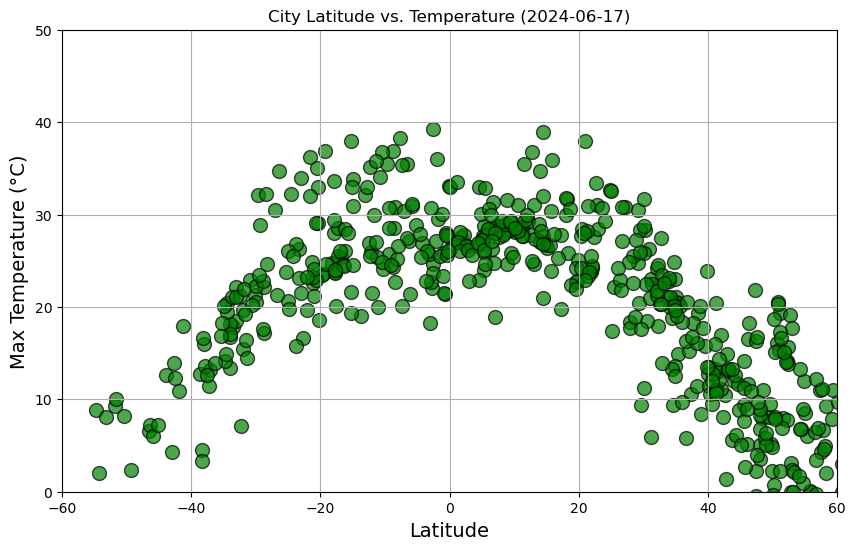

In [31]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=0.7, c='green', edgecolors='black', s=100)


# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (°C)", fontsize=14)
plt.grid(True)
plt.xlim(-60, 60)  
plt.ylim(0, 50)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

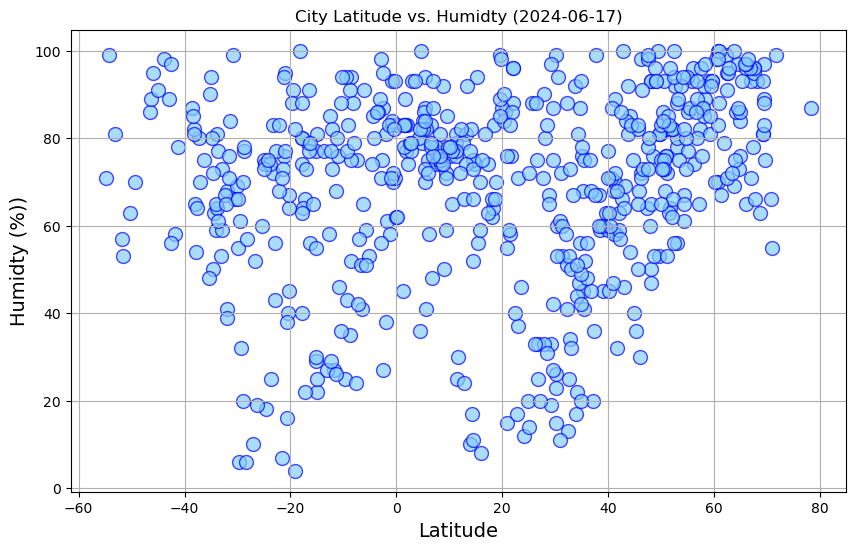

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=0.7, c='lightskyblue', edgecolors='blue', s=100)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidty (2024-06-17)")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidty (%))", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

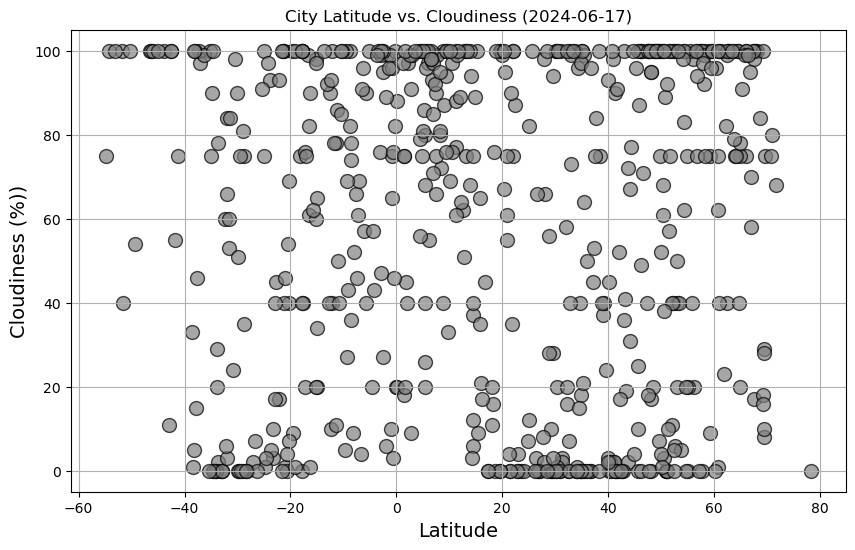

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=0.7, c='gray', edgecolors='black', s=100)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%))", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

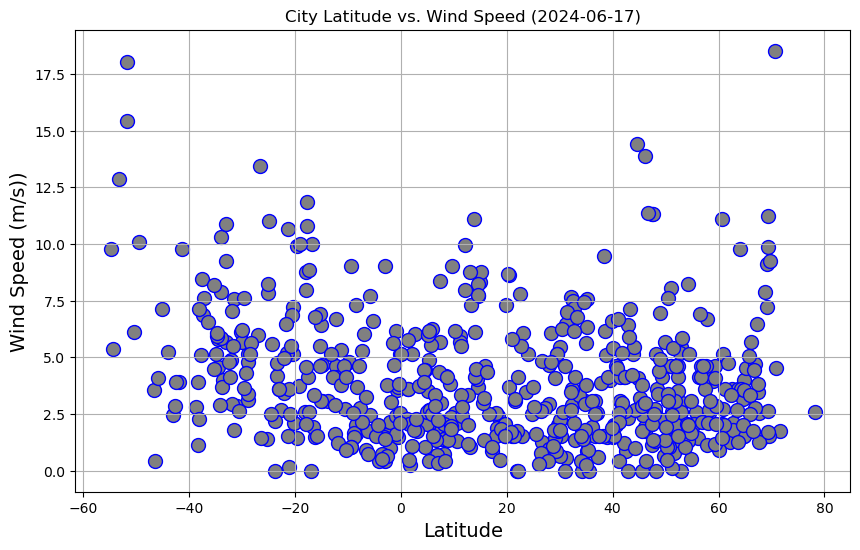

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=1, c='gray', edgecolors='b', s=100)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (m/s))", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(df['x'], df['y'])
    

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,olonkinbyen,70.9221,-8.7187,-2.96,55,80,4.54,SJ,1729869590
4,balkanabat,39.5108,54.3671,15.72,63,24,3.98,TM,1729869593
5,zhangye,38.9342,100.4517,8.41,45,37,1.48,CN,1729869594
9,bilibino,68.0546,166.4372,-18.95,93,100,1.40,RU,1729869599
11,tiksi,71.6872,128.8694,-21.42,99,68,1.76,RU,1729869602


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.39,70,54,10.08,TF,1729869587
1,adamstown,-25.0660,-130.1015,20.65,75,100,7.84,PN,1729869589
3,west island,-12.1568,96.8225,25.99,73,40,4.63,CC,1729869591
6,puerto natales,-51.7236,-72.4875,9.25,57,100,18.01,CL,1729869330
7,papatowai,-46.5619,169.4708,6.57,86,100,3.56,NZ,1729869596


###  Temperature vs. Latitude Linear Regression Plot

R_squared value = 0.7296953399721744


Text(0, 0.5, 'Max Temp')

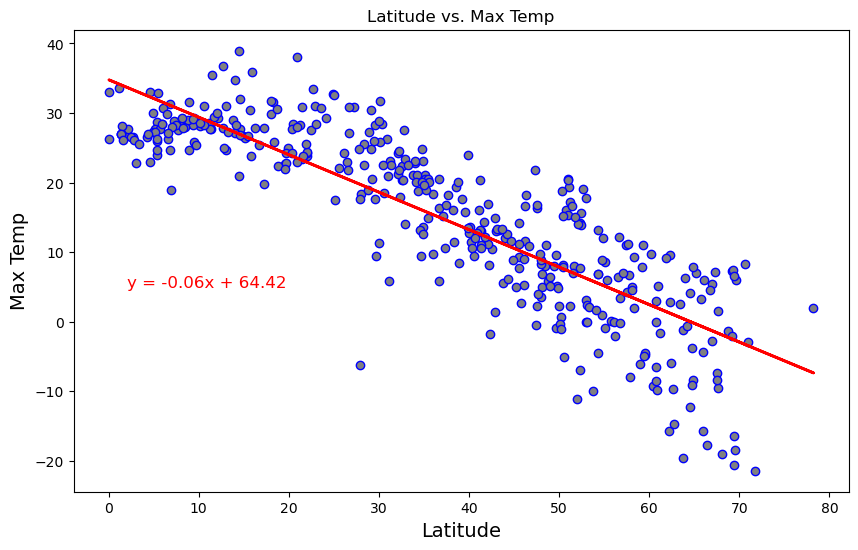

In [94]:
# Linear regression on Northern Hemisphere
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

latitudes = northern_hemi_df['Lat']
p_fit = p_slope * latitudes + p_int

# R^2 Value
r_squared = p_r**2
print(f'R_squared value = {r_squared}')

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], alpha=1, c='gray', edgecolors='b')
equation_text = f"y = {p_slope:.2f}x + {p_int:.2f}"
plt.text(x=2, y=5, s=slope_text, fontsize=12, color='red', backgroundcolor='white')

plt.plot(latitudes, p_fit, color='red', linewidth=2)
# Incorporate the other graph properties
plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temp", fontsize=14)
#plt.grid(True)

R_squared value = 0.5181837351185903


Text(0, 0.5, 'Max Temp')

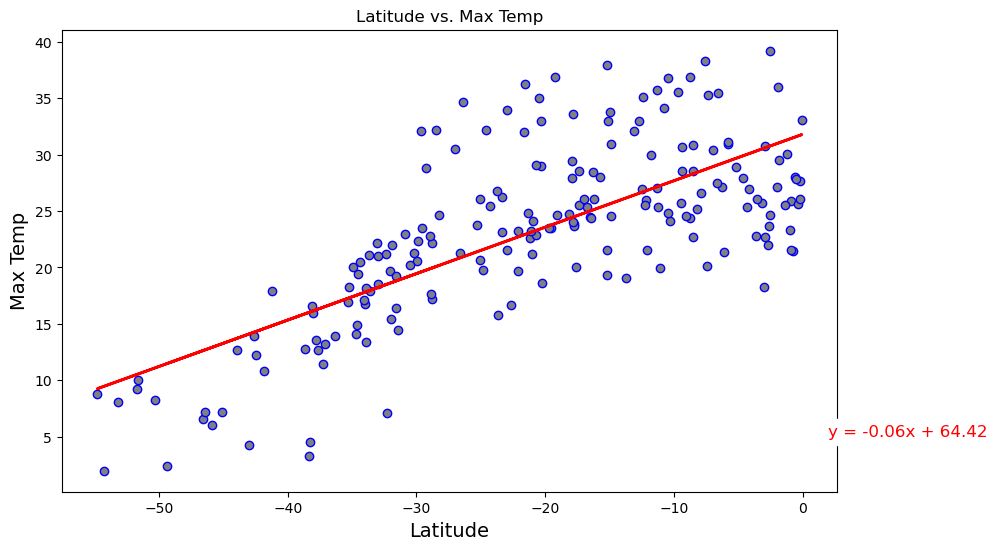

In [93]:
# Linear regression on Southern Hemisphere
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

latitudes = southern_hemi_df['Lat']
p_fit = p_slope * latitudes + p_int

# R^2 Value
r_squared = p_r**2
print(f'R_squared value = {r_squared}')

plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], alpha=1, c='gray', edgecolors='b')
equation_text = f"y = {p_slope:.2f}x + {p_int:.2f}"
plt.text(x=2, y=5, s=slope_text, fontsize=12, color='red', backgroundcolor='white')

plt.plot(latitudes, p_fit, color='red', linewidth=2)
plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temp", fontsize=14)
#plt.grid(True)

**Discussion about the linear relationship:** The regression lines for both graphs show a decent fit to the data implying there is a correlation between the latitude and max temperature. The R Squared value is large which also shows that the data points are more grouped around the regression line, a stronger correlation.  

### Humidity vs. Latitude Linear Regression Plot

R_squared value = 0.05406230394796231


Text(0, 0.5, 'Humidity')

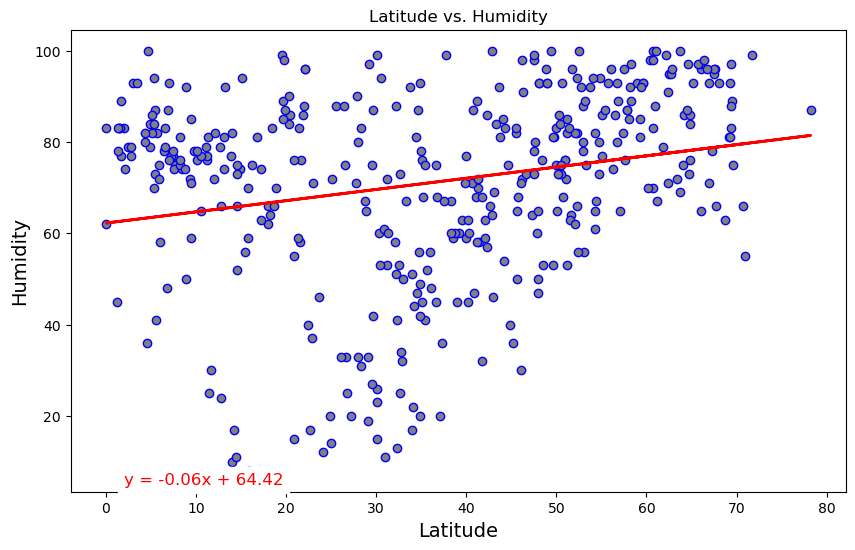

In [92]:
# Northern Hemisphere
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

latitudes = northern_hemi_df['Lat']
p_fit = p_slope * latitudes + p_int

# R^2 Value
r_squared = p_r**2
print(f'R_squared value = {r_squared}')

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], alpha=1, c='gray', edgecolors='b')
equation_text = f"y = {p_slope:.2f}x + {p_int:.2f}"
plt.text(x=2, y=5, s=slope_text, fontsize=12, color='red', backgroundcolor='white')

plt.plot(latitudes, p_fit, color='red', linewidth=2)

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity", fontsize=14)
#plt.grid(True)

R_squared value = 0.0015105250140644481


Text(0, 0.5, 'Humidity')

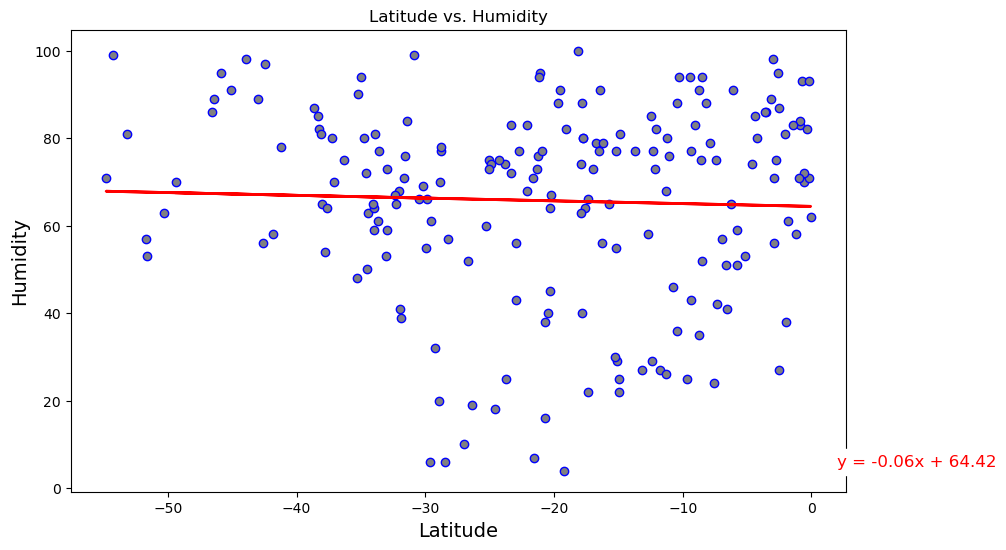

In [91]:
# Southern Hemisphere
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

latitudes = southern_hemi_df['Lat']
p_fit = p_slope * latitudes + p_int

# R^2 Value
r_squared = p_r**2
print(f'R_squared value = {r_squared}')

plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], alpha=1, c='gray', edgecolors='b')

equation_text = f"y = {p_slope:.2f}x + {p_int:.2f}"
plt.text(x=2, y=5, s=slope_text, fontsize=12, color='red', backgroundcolor='white')

plt.plot(latitudes, p_fit, color='red', linewidth=2)
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity", fontsize=14)
#plt.grid(True)

**Discussion about the linear relationship:** The regression lines are mostly horizontal and the data points have a larger variance. The R squared value is also very small. This implies there is a weaker correlation between the latitude and humidity for both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

R_squared value = 0.0001965349059604976


Text(0, 0.5, 'Cloudiness')

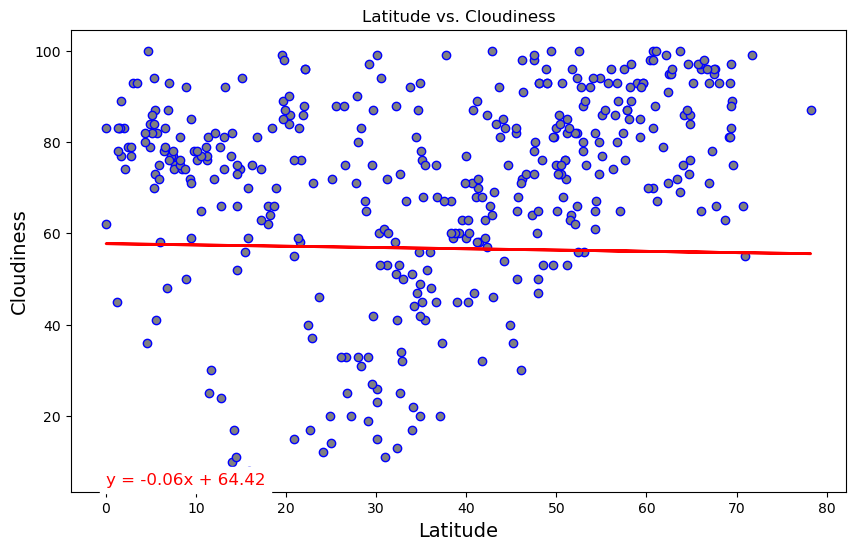

In [90]:
# Northern Hemisphere
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

latitudes = northern_hemi_df['Lat']
p_fit = p_slope * latitudes + p_int

# R^2 Value
r_squared = p_r**2
print(f'R_squared value = {r_squared}')

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], alpha=1, c='gray', edgecolors='b')

equation_text = f"y = {p_slope:.2f}x + {p_int:.2f}"
plt.text(x=0, y=5, s=slope_text, fontsize=12, color='red', backgroundcolor='white')

plt.plot(latitudes, p_fit, color='red', linewidth=2)

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)
#plt.grid(True)

R_squared value = 0.004797054611282242


Text(0, 0.5, 'Cloudiness')

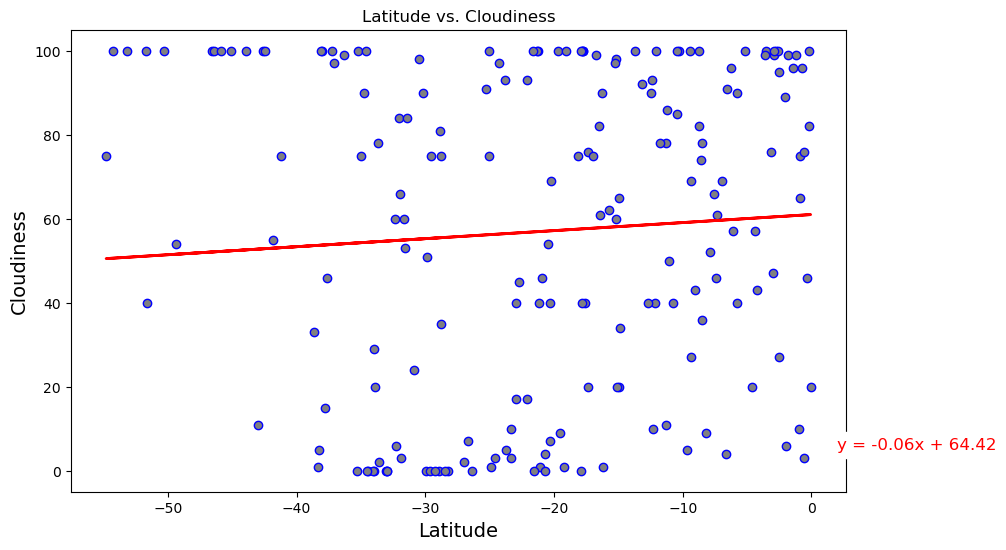

In [89]:
# Southern Hemisphere
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

latitudes = southern_hemi_df['Lat']
p_fit = p_slope * latitudes + p_int
# R^2 Value
r_squared = p_r**2
print(f'R_squared value = {r_squared}')

plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], alpha=1, c='gray', edgecolors='b')

equation_text = f"y = {p_slope:.2f}x + {p_int:.2f}"
plt.text(x=2, y=5, s=slope_text, fontsize=12, color='red', backgroundcolor='white')

plt.plot(latitudes, p_fit, color='red', linewidth=2)
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)
#plt.grid(True)

**Discussion about the linear relationship:** The data points are highly spread and there is a very small r squared value. The correlation between latitude and cloudiness between both hemispheres is very weak. 

### Wind Speed vs. Latitude Linear Regression Plot

R_squared value = 0.002446721876906456


Text(0, 0.5, 'Wind Speed')

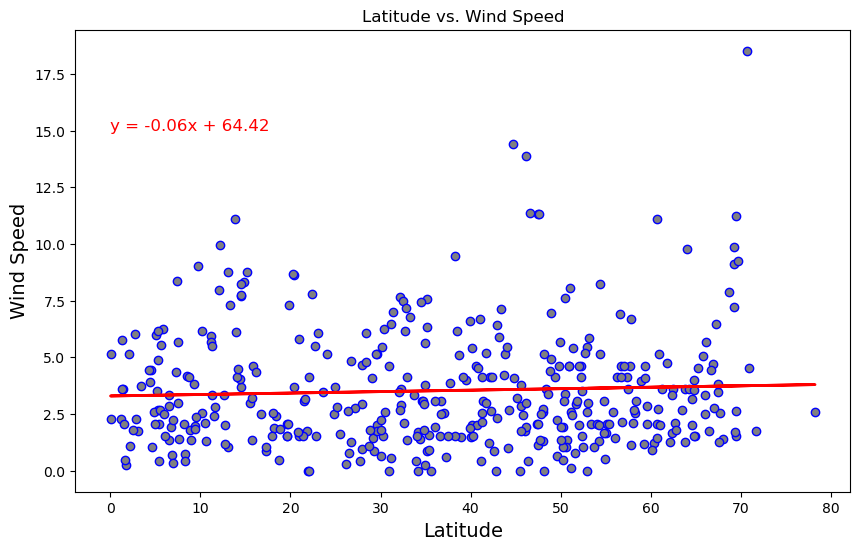

In [88]:
# Northern Hemisphere
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

latitudes = northern_hemi_df['Lat']
p_fit = p_slope * latitudes + p_int

# R^2 Value
r_squared = p_r**2
print(f'R_squared value = {r_squared}')

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], alpha=1, c='gray', edgecolors='b')

equation_text = f"y = {p_slope:.2f}x + {p_int:.2f}"
plt.text(x=0, y=15, s=slope_text, fontsize=12, color='red', backgroundcolor='white')

plt.plot(latitudes, p_fit, color='red', linewidth=2)

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed", fontsize=14)

#plt.grid(True)

R_squared value = 0.16775985893996356


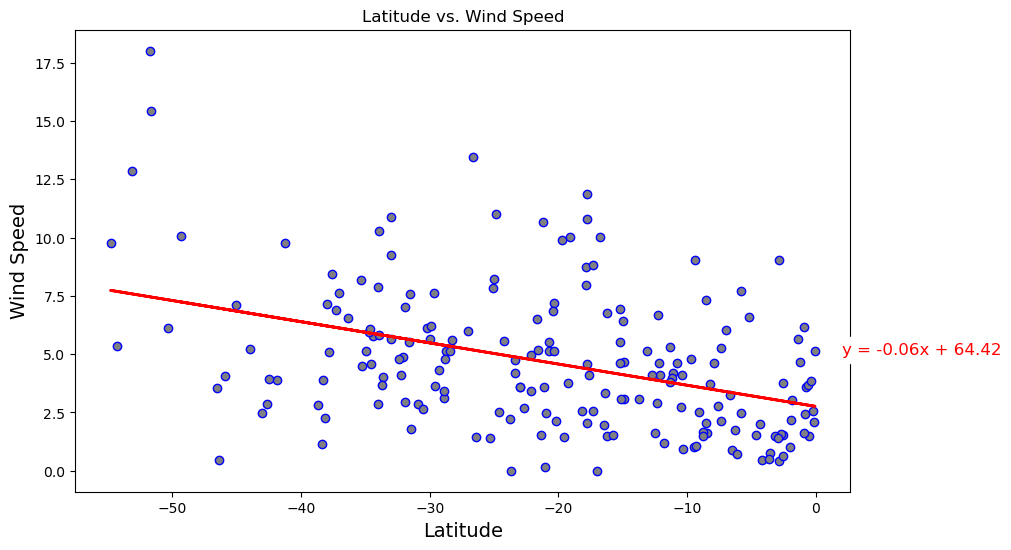

In [87]:
# Southern Hemisphere
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

latitudes = southern_hemi_df['Lat']
p_fit = p_slope * latitudes + p_int

# R^2 Value
r_squared = p_r**2
print(f'R_squared value = {r_squared}')

# Make the Plot
plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], alpha=1, c='gray', edgecolors='b')

equation_text = f"y = {p_slope:.2f}x + {p_int:.2f}"
plt.text(x=2, y=5, s=slope_text, fontsize=12, color='red', backgroundcolor='white')

plt.plot(latitudes, p_fit, color='red', linewidth=2)
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed", fontsize=14)
#plt.grid(True)


**Discussion about the linear relationship:** The northern hemisphere has a very slight positive regression while the southern hemisphere is a bit stronger negative regression. The R squared value for the northern hemisphere is very small with more spread between the data points while the southern hemisphere is stronger implying a stronger correlation. 